In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from bcg_code import *

from IPython.display import clear_output

In [2]:
names = ['outliers20','nos7','bcsstm25','raefsky4','model','fastdecay']

In [3]:
def num_to_tex(x):
    exp = int(np.floor(np.log10(abs(x))))
    return f'{x / 10**exp:1.1f} \\times 10^{{{exp}}}'


In [4]:
def downsample(Λ):

    d = len(Λ)
    Λ_runs = []
    idx_runs = []
    
    Λ_run = [Λ[0]]
    idx_run = [0]
    
    gap_tol = -np.log10(Λ[-1])/500
    tol = -np.log10(Λ[-1])/1000
    for i in range(0,d-1):
                   
        if np.log10(Λ[i]) - np.log10(Λ[i+1]) > gap_tol:
            if i != idx_run[-1]:
                Λ_run.append(Λ[i])
                idx_run.append(i)
                          
            Λ_runs.append(Λ_run)
            idx_runs.append(idx_run)
    
            Λ_run = [Λ[i+1]]
            idx_run = [i+1]
            
        elif np.log10(Λ_run[-1]) - np.log10(Λ[i]) > tol:
            if i != idx_run[-1]:
                Λ_run.append(Λ[i])
                idx_run.append(i)
    
    Λ_run.append(Λ[d-1])
    idx_run.append(d-1)
                  
    Λ_runs.append(Λ_run)
    idx_runs.append(idx_run)
    return idx_runs,Λ_runs

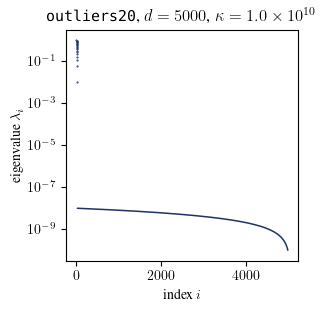

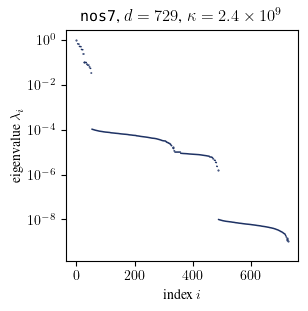

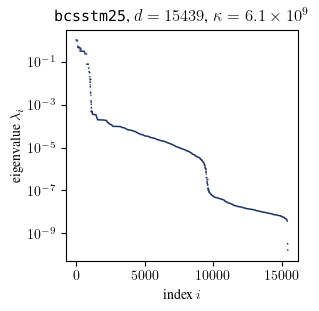

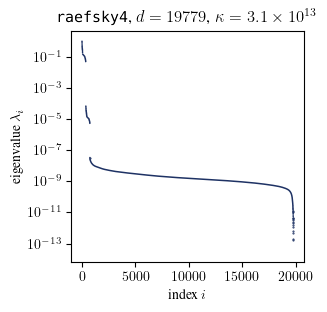

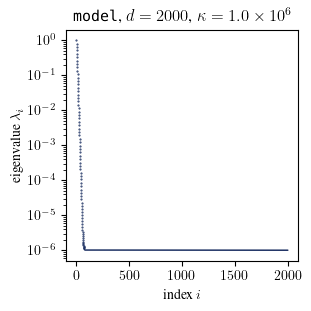

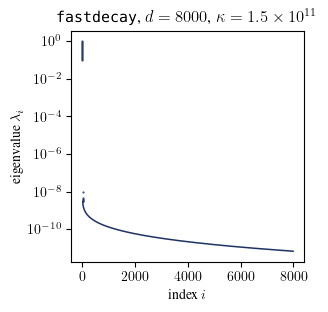

In [5]:
for name in names:

    Λ = np.load(f'matrices/{name}.npy')
    d = len(Λ)

    idx_runs,Λ_runs = downsample(Λ/Λ[0])
    
    fig,ax = plt.subplots(1,1,figsize=(3,3))

    for idx_run,Λ_run in zip(idx_runs,Λ_runs):
        if len(idx_run) > 1:
            plt.plot(idx_run,Λ_run,ls='-',lw=1.1,solid_capstyle='round',color=c1)
        else:
            plt.plot(idx_run,Λ_run,ls='None',marker='.',ms=1,color=c1)

    plt.title(f'\\texttt{{{name}}}, $d={d}$, $\\kappa={num_to_tex(Λ[0]/Λ[-1])}$')
    plt.ylabel(f'eigenvalue $\lambda_i$')
    plt.xlabel(f'index $i$')
    
    plt.yscale('log')

    plt.savefig(f"imgs/spec_{name}.pdf",bbox_inches='tight')

    # plt.close()